In [ ]:
#predict Boston dataset housing prices 

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#import the dataset
dataset=pd.read_csv('/content/Boston.csv')
dataset

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
#check for missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


-> no missing data
->nothing needs to be encoded
-> so we can go and split the data

In [ ]:
# split the data into x,y,training and testing set
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values


In [ ]:
#fixing the y dimensions
y=y.reshape(len(y),1)
y.shape
print(type(x))

#Feature Scaling for Independent Variables
for i in range(x.shape[1]-2):
  x[:,i] = (x[:,i] - int(np.mean(x[:,i])))/np.std(x[:,i])



<class 'numpy.ndarray'>


In [ ]:
#add a 1 to the front of both features for X_0
col=np.ones(x.shape[0])
x= np.insert(x,0,col,axis=1)
x.shape
print(x.shape)
#after this x and y are ready for testing, for this example lets just not split the data set and for now just see how it performs 

(506, 14)


In [ ]:
#splitting into a training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#hypothesis - theta*x array - theta should be row array(x rows,1) and length is the number of features
def h_x(theta,x):
  hx=np.dot(x,theta)
  return hx 

In [ ]:
#cost function - J(theta)
def cost_func(x,y,theta):
  m=y.shape[0]
  h=h_x(theta,x)
  j_theta=(1/(2*m))*np.sum(np.square(h-y))
  return j_theta

In [ ]:
#gradient descent -- how you update the theta -- going to the gloabal minimum

def grad_descent(x,y,theta,learningrate,iterations):
  Jtheta=[]
  m=y.size
  print(m)
  for i in range(iterations):
    hx= h_x(theta,x)
    dtheta=(1/m)*np.dot(x.T,hx-y)
    theta=theta-(learningrate*dtheta)
    Jtheta.append(cost_func(x,y,theta))
  return theta,Jtheta



In [ ]:
#testing the linear regression

theta = np.zeros((x.shape[1], 1))
learningrate=0.000001
iterations=1000
theta,Jtheta=grad_descent(x_train,y_train,theta,learningrate,iterations)


404


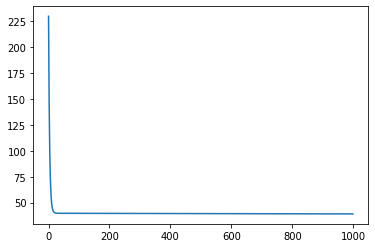

In [ ]:
#plotting the cost function
rng=np.arange(0,iterations)
plt.plot(rng,Jtheta)
plt.show()

In [ ]:
#print(theta)
result=h_x(theta,x_test)
error=(1/x_test.shape[0])*np.sum(np.abs(result-y_test))
#error=((np.abs(result-y))/y)*100
#print(np.average(error))
print(error)

6.899517906285562


In [ ]:
print(result[0:10])

[[24.39647395]
 [24.40750668]
 [23.88408416]
 [24.33303177]
 [23.31578085]
 [23.60969414]
 [24.46250986]
 [23.01295807]
 [24.16476741]
 [24.07121506]]


In [ ]:
print(y_test[0:10])

[[28.2]
 [23.9]
 [16.6]
 [22. ]
 [20.8]
 [23. ]
 [27.9]
 [14.5]
 [21.5]
 [22.6]]


In [ ]:
#linear regression using sklearn
import sklearn
from sklearn.linear_model import LinearRegression
train_model= LinearRegression().fit(x_train,y_train)
y_predict=train_model.predict(x_test)

In [ ]:

error=(1/x_test.shape[0])*np.sum(np.abs(y_predict-y_test))
#error=((np.abs(y_predict-y))/y)*100
#print(np.average(error))
print(error)

3.7507121808389194


In [ ]:
print(y_predict[0:10])

[[32.65503184]
 [28.0934953 ]
 [18.02901829]
 [21.47671576]
 [18.8254387 ]
 [19.87997758]
 [32.42014863]
 [18.06597765]
 [24.42277848]
 [27.00977832]]
